In [1]:
pip install tensorflow


In [11]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [12]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


In [13]:
# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

In [14]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [16]:
# Train the model
history = model.fit(train_images, train_labels, epochs=1,
                    validation_data=(test_images, test_labels))

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')


1563/1563 [==============================] - 105s 67ms/step - loss: 1.4518 - accuracy: 0.4728 - val_loss: 1.3164 - val_accuracy: 0.5209
313/313 - 4s - loss: 1.3164 - accuracy: 0.5209 - 4s/epoch - 11ms/step
Test accuracy: 0.5209000110626221


313/313 [==============================] - 3s 11ms/step


<Figure size 800x600 with 0 Axes>

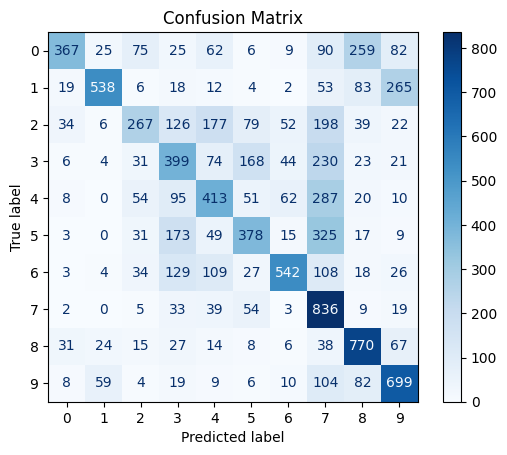

In [17]:
# Confusion matrix
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [18]:
# Test on a single image
def test_single_image(image):
    # Resize image to match model input size (32x32 for CIFAR-10)
    resized_image = tf.image.resize(image, (32, 32))
    # Normalize pixel values
    normalized_image = resized_image / 255.0
    # Add batch dimension
    input_image = tf.expand_dims(normalized_image, axis=0)
    # Predict
    predictions = model.predict(input_image)
    # Get predicted label
    predicted_label = np.argmax(predictions[0])
    return predicted_label


1/1 [==============================] - 0s 18ms/step
Actual Label: 3, Predicted Label: 3


<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

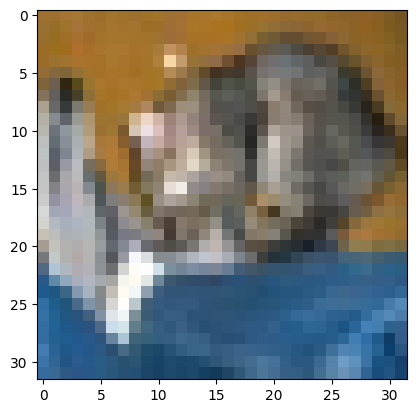

In [19]:
# Example of testing on a single image from test set
index = 0  # Choose any index from 0 to 9999 (for CIFAR-10)
single_image = test_images[index]
predicted_label = test_single_image(single_image)
actual_label = test_labels[index][0]

print(f'Actual Label: {actual_label}, Predicted Label: {predicted_label}')

# Display the image and its predicted label
plt.figure()
plt.imshow(single_image)
plt.title
